# Pymaceuticals Inc.
---

### Analysis

1. A table summarizing statistics, including the mean, median, variance, standard deviation, and standard error of the mean (SEM), for tumor volume across different drug regimens.
2. A bar chart created using Pandas' DataFrame.plot() and Matplotlib's pyplot to visualize the count of data points for each treatment regimen.
3. A pie chart generated with Pandas' DataFrame.plot() and Matplotlib's pyplot to illustrate the distribution of male and female mice within the study.
4. Computation of the final tumor volume for each mouse within four of the most promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin), including quartiles, interquartile range (IQR), and identification of potential outliers across these regimens.
5. A box and whisker plot depicting the final tumor volume for all four treatment regimens, highlighting potential outliers by altering their color and style.
6. A line graph displaying the relationship between time points and tumor volume for a single mouse subjected to Capomulin treatment.
7. A scatter plot illustrating the correlation between mouse weight and average tumor volume for the Capomulin treatment regimen.
8. Calculation of the correlation coefficient and establishment of a linear regression model between mouse weight and average tumor volume for the Capomulin treatment, with the regression line overlaid on the scatter plot.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
Mice_Count = len(combined_data["Mouse ID"].unique())
Mice_Count

249

In [81]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicated_Mice = combined_data.duplicated(subset=["Mouse ID","Timepoint"])
Duplicated_Mice
Duplicated_Mice_Df = combined_data.loc[combined_data["Duplicated Mice ID and Timepoint"] == True]
Duplicated_Mice_Df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated Mice ID and Timepoint
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [82]:
# Optional: Get all the data for the duplicate mouse ID. 
Mice_Df_g989 = combined_data.loc[combined_data["Mouse ID"] == "g989"]
Mice_Df_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated Mice ID and Timepoint
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [83]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data[combined_data["Mouse ID"] !="g989"]

In [84]:
# Checking the number of mice in the clean DataFrame.
Mice_Count_AfterRemoval = len(combined_data["Mouse ID"].unique())
Mice_Count_AfterRemoval

248

## Summary Statistics

In [85]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#Mean DataFrame
mean_tumour_volume = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_df = pd.DataFrame({
    "Drug Regimen": mean_tumour_volume.index,
    "Mean": mean_tumour_volume.values})

#Median DataFrame
median_tumour_volume = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
med_df = pd.DataFrame({
    "Drug Regimen": median_tumour_volume.index,
    "Median": median_tumour_volume.values}) 

#variance DataFrame
variance_tumour_volume = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
var_df = pd.DataFrame({
    "Drug Regimen": variance_tumour_volume.index,
    "Variance": variance_tumour_volume.values}) 

#standard deviation turnover volume including dataframe
std_turnover_volume = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_df = pd.DataFrame({"Drug Regimen": std_turnover_volume.index,
                       "Standard Deviation": std_turnover_volume.values}) 

#SEM DataFrame
sem_tumour_volume = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_df = pd.DataFrame({
    "Drug Regimen": sem_tumour_volume.index,
    "SEM": sem_tumour_volume.values}) 
# Assemble the resulting series into a single summary DataFrame.


In [86]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = mean_df.merge(med_df,on="Drug Regimen").merge(var_df,on="Drug Regimen").merge(std_df,on="Drug Regimen").merge(sem_df,on="Drug Regimen")
summary_df = summary_df.set_index(["Drug Regimen"])
summary_df.index.name = None
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation_method = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_aggregation_method = summary_aggregation_method.rename(columns= {"mean":"Mean",
                                            "median":"Median",
                                            "var":"Variance",
                                            "std":"Standard Deviation",
                                            "sem":"SEM"})
summary_aggregation_method.index.name = None
summary_aggregation_method

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_plot = combined_data.groupby("Drug Regimen")["Timepoint"].count()
timepoint_plot

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

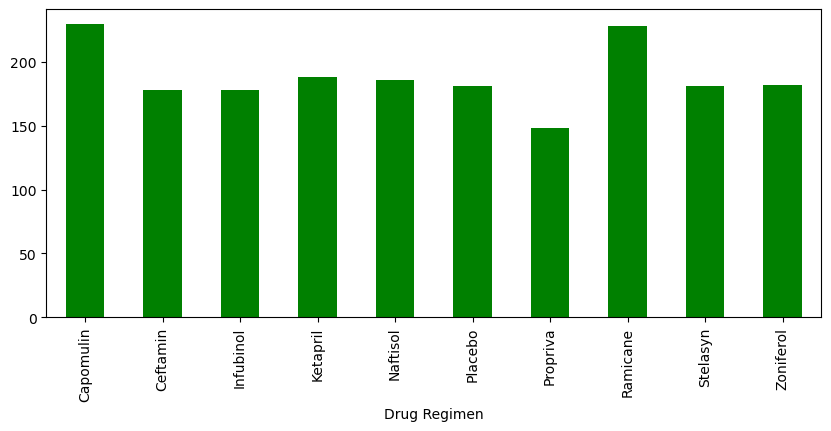

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_plot.plot(kind="bar", color = "green", figsize=(10,4))
timepoint_plot

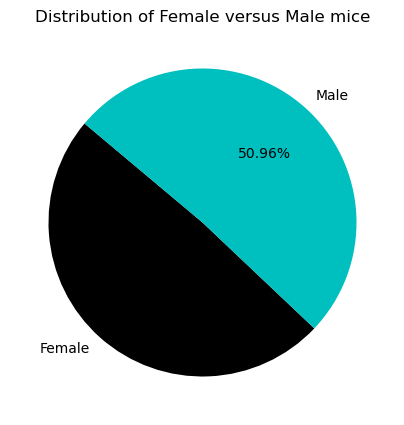

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_plot = combined_data.groupby("Sex")["Mouse ID"].count()
colours = ["black", "c"]
gender_plot.plot(kind= "pie", figsize=(5, 5), colors=colours, autopct = "%1.2f%%", startangle=140,ylabel="", title = "Distribution of Female versus Male mice")
plt.show()
                

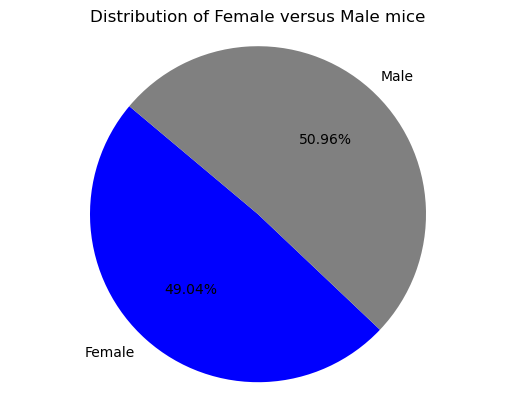

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_plot.index.values
x_axis = gender_plot
colours = ["blue","grey"]
plt.pie(x_axis, labels=labels, colors=colours,autopct="%1.2f%%", startangle=140)
plt.title("Distribution of Female versus Male mice")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
combined_data_last_entry = combined_data.groupby("Mouse ID")["Timepoint"].max()
last_entry_df = pd.DataFrame({"Mouse ID": combined_data_last_entry.index,
                              "Timepoint": combined_data_last_entry.values})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_lastentry_df = pd.merge(last_entry_df, combined_data, how = "left", on = ["Mouse ID","Timepoint"])


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = drugs_selected

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


IndentationError: unexpected indent (3549689925.py, line 9)

In [93]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

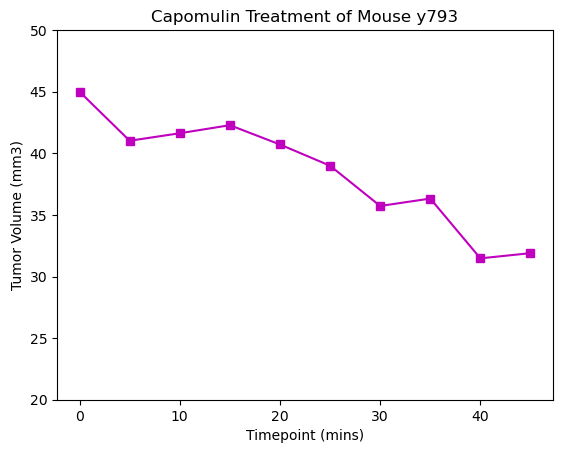

In [94]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_Mouse_y793_df = combined_data.loc[combined_data["Mouse ID"] == "y793"]
Capomulin_Mouse_y793_df
x_axis = Capomulin_Mouse_y793_df["Timepoint"]
y_axis = Capomulin_Mouse_y793_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color = "m", marker = 's')
plt.title("Capomulin Treatment of Mouse y793")
plt.xlabel("Timepoint (mins)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20,50)
plt.show()

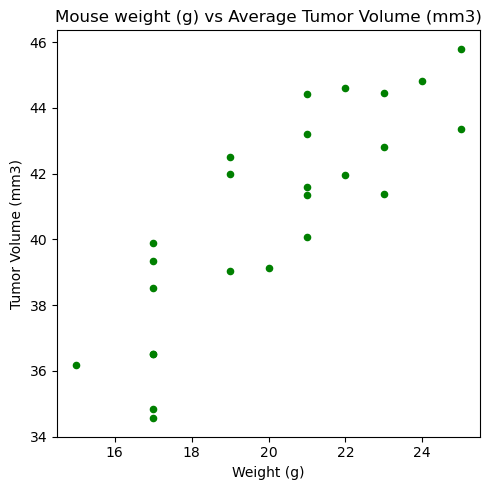

In [95]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
Capomulin_Weight_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')["Weight (g)"].unique())
Capomulin_Avg_Tumour_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
avg_vol_weight_df = pd.merge(Capomulin_Avg_Tumour_df, Capomulin_Weight_df, on='Mouse ID')
avg_vol_weight_df["Weight (g)"] = avg_vol_weight_df["Weight (g)"].astype('int64')
avg_vol_weight_df.plot(kind ="scatter",x="Weight (g)", y = "Tumor Volume (mm3)", color = "g", 
                       figsize = (5,5), title = "Mouse weight (g) vs Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show() 

## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_value = avg_vol_weight_df["Weight (g)"]
y_value = avg_vol_weight_df["Tumor Volume (mm3)"]
correlation_cefficient = avg_vol_weight_df["Weight (g)"].corr(avg_vol_weight_df['Tumor Volume (mm3)'])

The correlation between weight (g) and average tumor volume (mm3) on the Capomulin regimen is 0.84.
-------------------------------------------------------------------------------


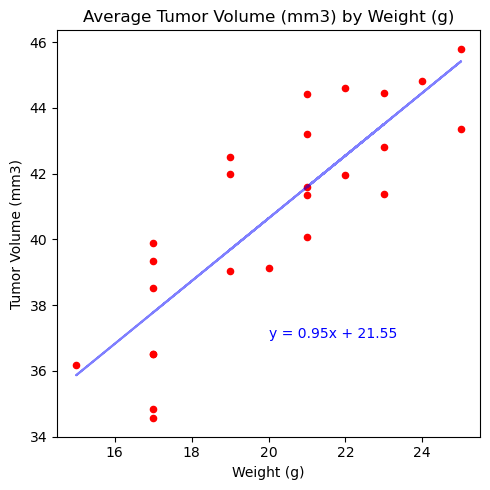

In [97]:
correlation_cefficient = avg_vol_weight_df["Weight (g)"].corr(avg_vol_weight_df['Tumor Volume (mm3)'])
# Print the answer to above calculation of the correlation coefficient
print(f"The correlation between weight (g) and average tumor volume (mm3) on the Capomulin regimen is {round(correlation_cefficient,2)}.")
print("-------------------------------------------------------------------------------")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

avg_vol_weight_df.plot(kind ="scatter",x="Weight (g)", y = "Tumor Volume (mm3)", color = "r", 
                       figsize = (5,5), title = "Average Tumor Volume (mm3) by Weight (g)")
plt.plot(x_value,regress_values, color = 'b', alpha = 0.5)

plt.annotate(line_eq,(20,37),fontsize=10,color="blue")
plt.tight_layout()
plt.show()